In [24]:
import pandas as pd
import regex as re
import string 
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# preprocessing functions
# preprocessing
stop_words = stopwords.words('english')
stop_words += stopwords.words('spanish')

stop_words += list(string.punctuation)
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '’', 'amp', "'", '``', "''", '“' , '”', '...', "'s", "n't", 'covid19', 'coronavirus', 'covid_19', 'pandemic']

def remove_urls(dataframe):
#replace URL of a text
    dataframe['text'] = dataframe['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True)

# tokenize
# remove stop words, puncutation, lower()
def tokenize_lowercase(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed


C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:12: DeprecationWarning: invalid escape sequence \(
<>:12: DeprecationWarning: invalid escape sequence \(
<ipython-input-26-ba1d7e8449a7>:12: DeprecationWarning: invalid escape sequence \(
  dataframe['text'] = dataframe['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True)


In [41]:
# df = pd.read_csv('dataset-with-toxicity.csv') 
# df = pd.read_csv('with_country_codes.csv') 
df = df[df['country_code'] == 'US'] 
# df = df[df['country_code'] == 'GB'] 
# df = df[df['country_code'] == 'IN']

remove_urls(df)
df['text'] = df['text'].apply(tokenize_lowercase)

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: expected string or bytes-like object

In [28]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df['text'] for item in sublist]
word_freq = FreqDist(flat_words)
word_freq.most_common(30)

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('people', 2491),
 ('realdonaldtrump', 2120),
 ('new', 1934),
 ('us', 1915),
 ('cases', 1809),
 ('health', 1789),
 ('today', 1502),
 ('trump', 1369),
 ('deaths', 1302),
 ('fight', 1270),
 ('help', 1226),
 ('need', 1195),
 ('one', 1180),
 ('response', 1122),
 ('world', 1098),
 ('support', 1061),
 ('china', 1050),
 ('time', 1033),
 ('via', 1025),
 ('workers', 973),
 ('testing', 972),
 ('crisis', 963),
 ('like', 959),
 ('state', 956),
 ('patients', 952),
 ('president', 947),
 ('lockdown', 921),
 ('get', 919),
 ('spread', 875),
 ('says', 858)]

In [29]:
#retrieve word and count from FreqDist tuples
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


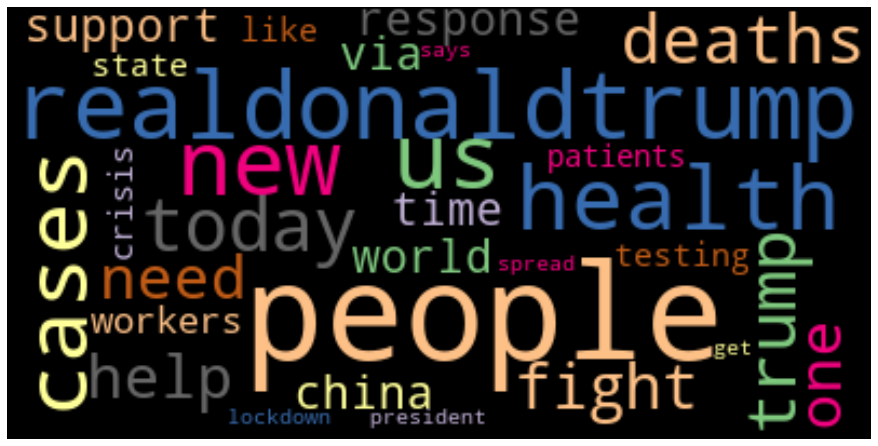

In [30]:
from wordcloud import WordCloud

#Create Word Cloud of top 30 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black').generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_30_cloud.png')
plt.show()

In [31]:
from gensim.corpora import Dictionary

text_dict = Dictionary(df.text)

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['text']]

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
from gensim.models.ldamodel import LdaModel

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.012*"realdonaldtrump" + 0.008*"trump" + 0.007*"deaths" + 0.007*"people" + 0.006*"new" + 0.006*"us" + 0.006*"china" + 0.005*"testing" + 0.005*"cases" + 0.005*"death"'),
 (1,
  '0.008*"health" + 0.005*"people" + 0.005*"social" + 0.005*"help" + 0.004*"need" + 0.004*"public" + 0.004*"masks" + 0.004*"spread" + 0.004*"must" + 0.004*"drtedros"'),
 (2,
  '0.009*"india" + 0.008*"fight" + 0.008*"lockdown" + 0.006*"stayhomestaysafe" + 0.005*"stay" + 0.005*"pm" + 0.005*"narendramodi" + 0.005*"home" + 0.005*"people" + 0.004*"govt"'),
 (3,
  '0.018*"cases" + 0.010*"new" + 0.007*"confirmed" + 0.007*"today" + 0.006*"deaths" + 0.005*"april" + 0.005*"total" + 0.005*"update" + 0.004*"patients" + 0.004*"mohfw_india"'),
 (4,
  '0.007*"workers" + 0.007*"us" + 0.006*"work" + 0.006*"thank" + 0.005*"response" + 0.005*"support" + 0.005*"world" + 0.005*"health" + 0.005*"crisis" + 0.005*"need"')]

In [40]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.024468 -0.189067       1        1  30.796736
4     -0.168834  0.012730       2        1  23.839700
1     -0.074271 -0.058430       3        1  18.962779
2     -0.011113  0.249285       4        1  14.744726
3      0.278686 -0.014518       5        1  11.656059, topic_info=                 Term         Freq        Total Category  logprob  loglift
163             cases  1669.000000  1669.000000  Default  30.0000  30.0000
91    realdonaldtrump  1858.000000  1858.000000  Default  29.0000  29.0000
98              trump  1146.000000  1146.000000  Default  28.0000  28.0000
167            deaths  1274.000000  1274.000000  Default  27.0000  27.0000
54                new  1778.000000  1778.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
221               via   128.494455   907.069934   Topic5  -6.0221   0.1950
72             health   134.909880  1556.645778   Topic5  -5.9734  -0.2963
1648             stay   106.765171   436.016003   Topic5  -6.2074   0.7423
428              live   107.622712   536.075535   Topic5  -6.1994   0.5437
113              home   104.449205   792.814934   Topic5  -6.2293   0.1225

[359 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
1198       1  0.370785        ..
1198       2  0.016479        ..
1198       4  0.609735        ..
911        1  0.558345      2020
911        5  0.441162      2020
...      ...       ...       ...
1881       3  0.018758         ⁦
1881       4  0.008526         ⁦
2456       1  0.999034        ▶️
24713      5  0.979968  ➡️states
6323       5  0.986130        ⬇️

[603 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 3, 4])